###Importing the required

In [1]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

In [2]:
import keras

###Loading and splitting the data

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [4]:
print("Training images : {}".format(x_train.shape))
print("Testinging images : {}".format(x_test.shape))

Training images : (50000, 32, 32, 3)
Testinging images : (10000, 32, 32, 3)


In [5]:
print(x_train[0].shape)

(32, 32, 3)


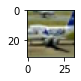

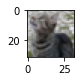

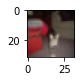

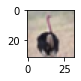

In [6]:
for i in range(332,336):
  plt.subplot(120 + 1 + i)
  img = x_train[i]
  plt.imshow(img)
  plt.show()


###Processing the data

In [7]:
x_train = x_train.reshape(x_train.shape[0], 32 , 32 , 3)
x_test = x_test.reshape(x_test.shape[0], 32 , 32 , 3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 225
x_test /= 225
n_classes = 10

print("Shape before one hot encoding : ", y_train.shape)
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one hot encoding : ", y_train.shape)

Shape before one hot encoding :  (50000, 1)
Shape after one hot encoding :  (50000, 10)


###Building the model

In [8]:
from keras.engine.sequential import Sequential
from keras.models import sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

model = Sequential()
#covolutional layers
model.add(Conv2D(50,kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout (0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D (pool_size=(2,2)))
model.add(Dropout(0.25))

model.add (Flatten())

# hidden layer
model.add (Dense (500, activation='relu'))
model.add(Dropout (0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout (0.3))
# output layer
model.add (Dense(10, activation='softmax'))

#compiling
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

#training the model
model.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
391/391 [==============================] - 31s 49ms/step - loss: 1.6171 - accuracy: 0.4046 - val_loss: 1.1872 - val_accuracy: 0.5753
Epoch 2/50
391/391 [==============================] - 19s 48ms/step - loss: 1.1213 - accuracy: 0.6030 - val_loss: 0.9138 - val_accuracy: 0.6851
Epoch 3/50
391/391 [==============================] - 19s 48ms/step - loss: 0.9414 - accuracy: 0.6711 - val_loss: 0.8431 - val_accuracy: 0.7063
Epoch 4/50
391/391 [==============================] - 19s 48ms/step - loss: 0.8362 - accuracy: 0.7100 - val_loss: 0.7608 - val_accuracy: 0.7373
Epoch 5/50
391/391 [==============================] - 19s 48ms/step - loss: 0.7536 - accuracy: 0.7370 - val_loss: 0.7232 - val_accuracy: 0.7497
Epoch 6/50
391/391 [==============================] - 19s 49ms/step - loss: 0.6902 - accuracy: 0.7606 - val_loss: 0.7464 - val_accuracy: 0.7453
Epoch 7/50
391/391 [==============================] - 19s 48ms/step - loss: 0.6394 - accuracy: 0.7754 - val_loss: 0.6729 - val_accuracy:

###predicting

In [9]:
classes = range(0,10)

names =[
"airplane",
"automobile",
"bird",
"cat",
"deer",
"dog",
"frog",
"horse",
"ship",
"truck"]

# zip the names and classes to make a dictionary of class labels
class_labels = dict(zip(classes, names))

# generate batch of 9 images to predict
batch = x_test[100:109]
labels = np.argmax(y_test[100:109],axis=-1)

# make predictions
predictions = model.predict(batch, verbose = 1)


1/1 [==============================] - 0s 207ms/step


In [10]:
print(predictions)

[[4.7576627e-08 1.1258079e-08 1.1365657e-03 2.9289428e-04 9.4381458e-01
  5.6654452e-03 1.1386958e-05 4.9078710e-02 2.6806211e-07 6.3150935e-08]
 [1.0194470e-05 9.6430877e-06 1.4771128e-02 1.2154572e-01 5.3504016e-03
  4.6739098e-01 1.1184570e-02 3.7968624e-01 1.6766406e-05 3.4429508e-05]
 [3.1287972e-11 2.5578251e-07 5.7586781e-06 1.3507489e-03 4.2688700e-07
  1.0133467e-06 9.9864155e-01 1.6236213e-07 1.6057237e-07 4.6817855e-10]
 [2.0562219e-09 3.6998549e-09 1.8588973e-06 9.9286920e-01 7.2394892e-07
  2.0262843e-05 7.1078120e-03 4.3129886e-09 1.3888582e-07 4.9910470e-10]
 [8.0503699e-19 1.0000000e+00 3.6285267e-21 9.2791239e-24 3.5952728e-25
  4.3229464e-20 2.2335187e-21 4.5902511e-20 8.3541621e-13 1.0983812e-08]
 [3.2848498e-12 9.9999988e-01 9.1679442e-12 5.1725776e-12 7.6833510e-13
  4.4459214e-11 4.9262674e-11 8.1031992e-10 6.7214998e-08 4.5418044e-08]
 [5.1346626e-05 1.4860118e-06 5.8439750e-02 7.1451908e-01 1.9575133e-05
  1.1524733e-02 2.1127822e-01 3.2361311e-07 4.1655176e-03 

In [11]:
for image in predictions:
  print(np.sum(image))

0.9999999
1.0
1.0000001
0.99999994
1.0
1.0
1.0
1.0
1.0000001


In [12]:
class_result = np.argmax(predictions,axis=-1)
print(class_result)

[4 5 6 3 1 1 3 6 8]


###Final object detection

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


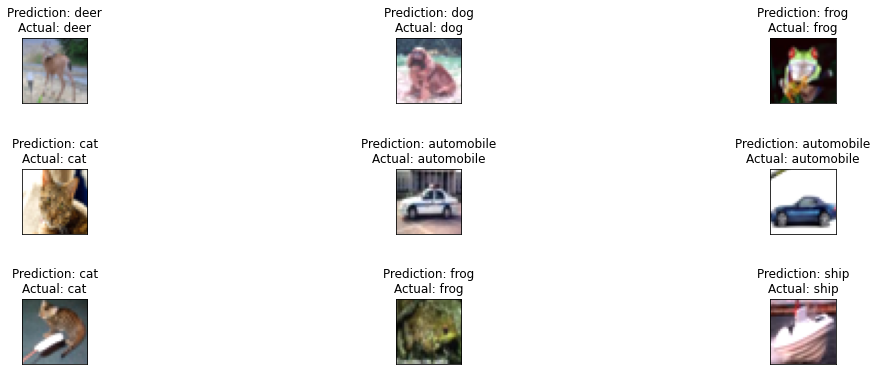

In [13]:
fig, axs= plt.subplots(3, 3, figsize = (19,6))
fig. subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):
  for key, value in class_labels.items():
    if class_result[i] == key:
      title ='Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
      axs[i].set_title(title)
      axs[i].axes.get_xaxis().set_visible(False)
      axs[i].axes.get_yaxis().set_visible(False)

  #plot the image
  axs[i].imshow(img)

#show the plot
plt.show()